In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
#유방암 진단 데이터셋으로 악성인지 양성인지 판단

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
df = pd.DataFrame(cancer.data , columns = cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
df['bengin'] = cancer.target

In [12]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,bengin
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [30]:
list_ = [0,2,3,7,20,21,22]
list = [0,2,3,7,20,21,22,-1]

In [17]:
df1 = df.iloc[:,list]
df1

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst texture,worst perimeter,bengin
0,17.99,122.80,1001.0,0.14710,25.380,17.33,184.60,0
1,20.57,132.90,1326.0,0.07017,24.990,23.41,158.80,0
2,19.69,130.00,1203.0,0.12790,23.570,25.53,152.50,0
3,11.42,77.58,386.1,0.10520,14.910,26.50,98.87,0
4,20.29,135.10,1297.0,0.10430,22.540,16.67,152.20,0
...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.13890,25.450,26.40,166.10,0
565,20.13,131.20,1261.0,0.09791,23.690,38.25,155.00,0
566,16.60,108.30,858.1,0.05302,18.980,34.12,126.70,0
567,20.60,140.10,1265.0,0.15200,25.740,39.42,184.60,0


In [18]:
cancer.feature_names[list]

array(['mean radius', 'mean perimeter', 'mean area',
       'mean concave points', 'worst radius', 'worst texture',
       'worst perimeter', 'worst fractal dimension'], dtype='<U23')

In [6]:
from sklearn.model_selection import train_test_split

In [66]:
x_train , x_test , y_train , y_test = train_test_split(cancer.data[:,list_], cancer.target , random_state = 42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
x_train.shape

(426, 8)

In [38]:
for i in range(1,420):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train , y_train)
    score = knn.score(x_train , y_train)
    print(score)

1.0
0.9530516431924883
0.9577464788732394
0.9483568075117371
0.9413145539906104
0.9389671361502347
0.9272300469483568
0.9366197183098591
0.9131455399061033
0.9178403755868545
0.8943661971830986
0.9061032863849765
0.8896713615023474
0.892018779342723
0.8873239436619719
0.8873239436619719
0.8849765258215962
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8802816901408451
0.8826291079812206
0.8802816901408451
0.8826291079812206
0.8849765258215962
0.8849765258215962
0.8849765258215962
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8802816901408451
0.8802816901408451
0.8802816901408451
0.8779342723004695
0.8779342723004695
0.8802816901408451
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8826291079812206
0.8849765258215962
0.8826291079812206
0.8873239436619719
0.8826291079812206
0.8802816901408451
0.8779342723004695
0.8826291

In [74]:
kn = KNeighborsClassifier(n_neighbors = 3)

kn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
df1

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst texture,worst perimeter,bengin
0,17.99,122.80,1001.0,0.14710,25.380,17.33,184.60,0
1,20.57,132.90,1326.0,0.07017,24.990,23.41,158.80,0
2,19.69,130.00,1203.0,0.12790,23.570,25.53,152.50,0
3,11.42,77.58,386.1,0.10520,14.910,26.50,98.87,0
4,20.29,135.10,1297.0,0.10430,22.540,16.67,152.20,0
...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.13890,25.450,26.40,166.10,0
565,20.13,131.20,1261.0,0.09791,23.690,38.25,155.00,0
566,16.60,108.30,858.1,0.05302,18.980,34.12,126.70,0
567,20.60,140.10,1265.0,0.15200,25.740,39.42,184.60,0


In [75]:
predict = [[18,122.7,1000.9 , 0.14700 , 25.379 , 17.2 , 184.5] , [7.5 , 47.9 , 180 , 0 , 9.44 , 30.38 , 59.1]]

In [76]:
kn.predict(predict)

array([0, 1])

In [77]:
kn.score(x_train , y_train)

0.9577464788732394

In [78]:
kn.score(x_test , y_test)

0.951048951048951

In [80]:
from sklearn.neighbors import KNeighborsClassifier

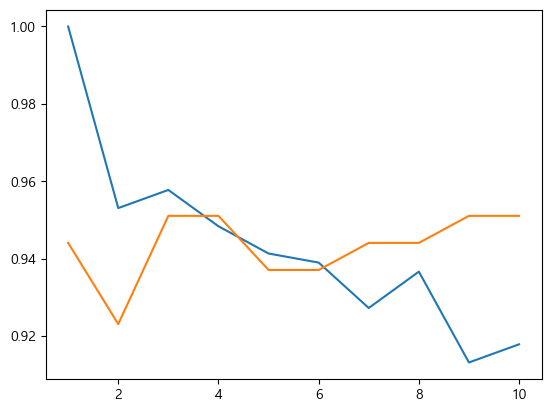

In [82]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train , y_train)
    training_accuracy.append(clf.score(x_train , y_train))
    test_accuracy.append(clf.score(x_test , y_test))
    
plt.plot(neighbors_settings , training_accuracy)
plt.plot(neighbors_settings , test_accuracy)
plt.show()